<h2> Data Visualization - COMP 1800 <br>
     Khassan Nazhem <br>
     Doctor Christopher Walshaw <br>
     A study on store's customer visits </h2>

<h1> 1- Imports:

In [1]:
%matplotlib inline

# Import `matplotlib` under the alias `plt`
import matplotlib.pyplot as plt
# Import `numpy` under the alias `np`
import numpy as np

# Import `pandas` under the alias `pd`
import pandas as pd

# Import `seaborn` under the alias `sns`
import seaborn as sns

# Import `holo views`
import hvplot.pandas


# Import `Panel` under the alias 'pn' for dashboard
import panel as pn

# Import 'Math'
import math

pn.extension()

# Listing the daily number of customer visits to the company's 40 stores
customers_visits = pd.read_csv('https://tinyurl.com/ChrisCoDV/001151725/DailyCustomers.csv', index_col=0)
customers_visits.index = pd.to_datetime(customers_visits.index)

# The total annual spend on local marketing for each store
marketing_expenses = pd.read_csv('https://tinyurl.com/ChrisCoDV/001151725/StoreMarketing.csv', index_col=0)

# The total annual cost of overheads for each store
overheads_cost = pd.read_csv('https://tinyurl.com/ChrisCoDV/001151725/StoreOverheads.csv', index_col=0)

# The store size (floor space) in metres squared for each store
store_size = pd.read_csv('https://tinyurl.com/ChrisCoDV/001151725/StoreSize.csv', index_col=0)

# The total number of full-time staff employed at each store
staff_num = pd.read_csv('https://tinyurl.com/ChrisCoDV/001151725/StoreStaff.csv', index_col=0)

<h1> 2- Quick look on data:

In [3]:
# Retrieve each block's first 5 lines of data to take a hint on the datas strcutre
print(customers_visits.head())
print('####################################################################')
print(marketing_expenses.head())
print('####################################################################')
print(overheads_cost.head())
print('####################################################################')
print(store_size.head())
print('####################################################################')
print(staff_num.head())

            QSN  MUY  PGL  YYO  RGS  PAA  VSM  WMB  UGJ  CFG  ...  MAJ  ENY  \
Date                                                          ...             
2019-01-01  934  394  446    0  554  606   77   76   76   68  ...    0   76   
2019-01-02  888  317  402    0  507  560   65   89   74   68  ...    0   83   
2019-01-03  855  370  398    0  486  444   77   65   66   68  ...    0   79   
2019-01-04  746  240  326    0  439  417   63   76   75   62  ...    0   93   
2019-01-05  646  246  338    0  399  454   69   67   70   70  ...    0   96   

            CNQ  TSE  XML  TAP  DTJ  ZSD   SGA  SMM  
Date                                                 
2019-01-01   59   85   87   77   80    0   904  992  
2019-01-02   77   75   94   90   72    0  1088  966  
2019-01-03   60   90   80   80   81    0   892  791  
2019-01-04   64   78   80   77   61    0   712  919  
2019-01-05   75   76   73   82   53    0   905  773  

[5 rows x 40 columns]
#############################################

<h1> 3- Compilation of data frames:

In [4]:
# Merging all the data into a single df called shop_data
shop_data = pd.DataFrame(index = customers_visits.columns)
shop_data['marketing_expenses'] = marketing_expenses.values
shop_data['customers_visits'] = customers_visits.sum().values
shop_data['store_size'] = store_size.values
shop_data['overheads_cost'] = overheads_cost.values
shop_data['staff_num'] = staff_num.values
variables = list(shop_data.columns)

# Preview of the data frame
shop_data.head()

marketing_expenses  customers_visits  store_size  overheads_cost  \
QSN               37000            319067        6109           12000   
MUY                9000            110325        1133           54000   
PGL               14000            145255        1891           99000   
YYO                1000              7192          65           50000   
RGS               18000            173118        2290           43000   

     staff_num  
QSN         67  
MUY          8  
PGL         10  
YYO          1  
RGS         13

<h1> 4- General look on the Data:

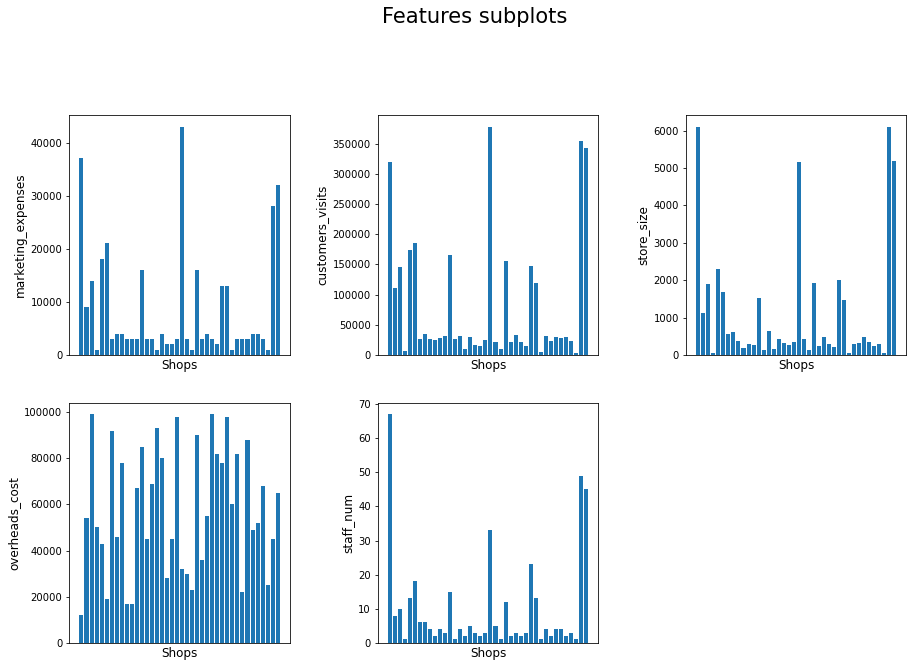

In [5]:
# Presenting all features of all shops in a bar subplot
plt.figure(figsize=(15, 15))
plt.suptitle('Features subplots',fontsize=21)
counter = 1
x_pos = np.arange(len(shop_data.index))
for attribute in shop_data:
    sub = plt.subplot(3, 3, counter)
    sub.bar(x_pos, shop_data[attribute],align='center')
    sub.set_xticks([])
    sub.set_xlabel('Shops', fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.2)  
plt.show()

<h4>Indications:</h4>
<li> Through this bar graph, we can distinguish between trends and outliers faster than a table of numerical data.
    <li> The y-axis holds the values of the five features, whereas each bar on x-axis presents a different shop.

In [6]:
# Sort the data according to the sum of size and preview top 15 stores
sorted_size = shop_data['store_size'].sort_values(ascending=False)
print("Stores Sizes")
print(sorted_size[:15])

print('####################################################################')

# Sort the data according to the sum of customer visits and preview top 15 stores
sorted_visits = shop_data['customers_visits'].sort_values(ascending=False)
print("Stores Visits")
print(sorted_visits[:15])

print('####################################################################')

# Sort the data according to the sum of marketing expenses and preview top 15 stores
print("Stores Marketing")
sorted_marketing = shop_data['marketing_expenses'].sort_values(ascending=False)
print(sorted_marketing[:15])

Stores Sizes
QSN    6109
SGA    6099
SMM    5192
RAH    5156
RGS    2290
NAQ    2018
OSG    1935
PGL    1891
PAA    1692
QMD    1531
OMV    1463
MUY    1133
WYG     645
WMB     621
VSM     554
Name: store_size, dtype: int64
####################################################################
Stores Visits
RAH    378259
SGA    353775
SMM    343509
QSN    319067
PAA    184730
RGS    173118
QMD    164884
OSG    155359
NAQ    147390
PGL    145255
OMV    119632
MUY    110325
WMB     34936
EFN     33629
WYG     31493
Name: customers_visits, dtype: int64
####################################################################
Stores Marketing
RAH    43000
QSN    37000
SMM    32000
SGA    28000
PAA    21000
RGS    18000
QMD    16000
OSG    16000
PGL    14000
OMV    13000
NAQ    13000
MUY     9000
EFN     4000
XML     4000
YGY     4000
Name: marketing_expenses, dtype: int64


<h4>We conclude:</h4>
<li> High stores in terms of size and visits: 'QSN', 'RAH', 'SGA', 'SMM'.
    <li> Medium stores in terms of size and visits: 'MUY', 'PGL', 'RGS', 'PAA', 'QMD', 'OSG', 'NAQ', 'OMV'.
        <li> Low stores in terms of size and visits: 'YYO', 'VSM', 'WMB', 'UGJ', 'CFG', 'BZM', 'BTB','UMU', 'WYG', 'NGB','YGY', 'NMO', 'AEI', 'VYZ', 'WGR', 'ZMS', 'DZT', 'EFN', 'ATT', 'XSV','MAJ', 'ENY', 'CNQ', 'TSE', 'XML', 'TAP', 'DTJ', 'ZSD'.

<h1> 5- Separating the data into 3 different sections based on store size as High, Medium & Low:

In [7]:
# Selection of high data >5000
high = shop_data.loc[shop_data['store_size'] > 5000].index
high_data = customers_visits[high]

# Selection of medium data > 1000 & < 5000
medium = shop_data.loc[(shop_data['store_size'] > 1000) & (shop_data['store_size'] < 5000)].index
medium_data = customers_visits[medium]

# Selection of low data < 1000
low = shop_data.loc[shop_data['store_size'] < 1000].index
low_data = customers_visits[low]

<h1> 6- Creating a rolling average graphs for the three different classes:

In [8]:
# In order to avoid unnecessary accumulation of noise created by line plots of data
# X days rolling average is applied on customer visits

def get_line_plot(volume, window_size, date_range):
    if volume == 'high':
        selected = high
    elif volume == 'medium':
        selected = medium
    elif volume == 'low':
        selected =low
    
    
    
    df = customers_visits[selected] # restrict to selected
    df = df.loc[pd.to_datetime(date_range[0]) : pd.to_datetime(date_range[1])] # restrict to date range
    df = df.rolling(window=window_size).mean() # calculate rolling average
    return df.hvplot.line(frame_height=500, frame_width=600, grid=True)


time_title = '### Time-Series'

volumes = ['high', 'medium','low']

volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Day average', value=7, start=1, end=21, width=200)
time_date_range = pn.widgets.DateRangeSlider(name='Dates', width=200,
                                        value=(customers_visits.index[0], customers_visits.index[-1]),
                                        start=customers_visits.index[0], end=customers_visits.index[-1])

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg, time_date_range),
    get_line_plot(volume.options[0], day_avg.value, time_date_range.value)
)

def update_time_row(event):
    time_row[1].object = get_line_plot(volume.value, day_avg.value, time_date_range.value)

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_date_range.param.watch(update_time_row, 'value')

time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['high', 'medium', 'low'], value='high', width=200)
        [2] IntSlider(end=21, name='Day average', start=1, value=7, value_throttled=7, width=200)
        [3] DateRangeSlider(end=Timestamp('2019-12-31 0..., name='Dates', start=Timestamp('2019-01-01 0..., value=(Timestamp('2019-01-01 00:..., value_throttled=(Timestamp('2019-01-01 00:..., width=200)
    [1] HoloViews(NdOverlay)

<h4>These three Holo plots volumes support:</h4>
<li> The ability to choose which volumes, day averages and dates.
<li> The ability to hide unwanted stores by clicking on the store name on the legend.
    <li> The ability to zoom in to specific sections using the zoom button.
        <li> The ability to hover on the graph to read the data.
            
<br>
<h4>Documentation:</h4>
<li> In the high stores keep as is to get a visual of number of visits variations.
<li> In the medium stores graph hide all the stores and keep 'QMD' & 'OSG' because they are of our interest.
<li> In the low stores hide all the stores but keep 'XSV', 'ZMS', 'NMO', 'AEI', 'NGB', 'YYO', 'MAJ', 'ZSD' because they indicate to new closed and open stores.

<h1> 7- Box plots to check top stores visits variations:

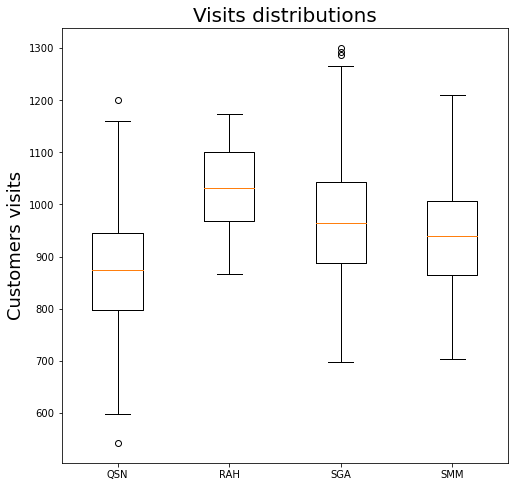

In [9]:
# Plot the figure for top stores
plt.figure(figsize=(8, 8))
plt.boxplot(customers_visits[high], labels=high)
plt.ylabel('Customers visits', fontsize=18)
plt.title('Visits distributions',fontsize=20)
plt.show()

<h4>Indications:</h4>
<li> y-axis: Customers visits values.
    <li> x-axis: stores.
<li> All stores are normally distributed except for 'RAH' because it has a low range.
    <li> Medians values: 'QSN' 900, 'RAH' 1050, 'SGA' 950, 'SMM' 930.
        <li> Range values: 'QSN' 600-1150, 'RAH' 890-1190, 'SGA' 700-1250, 'SMM' 700-1200.

<h1> 8- Bar plots to prove the box plot's visits variations:

23 bins


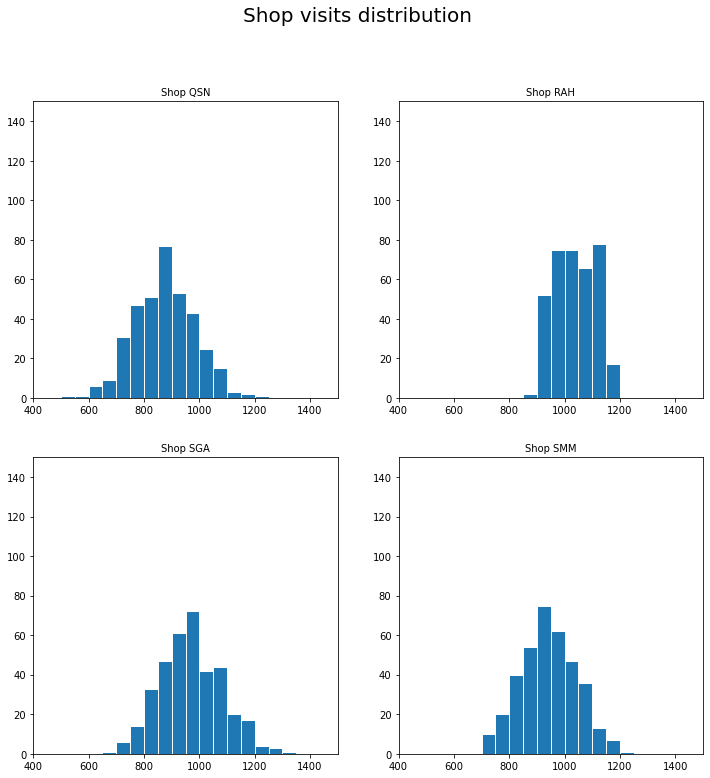

In [10]:
# Set the range of the x-axis & bin width
x_min = 400
x_max = 1500
bin_width = 50

# Set the number of bins
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins)
    for x in range(int(n_bins))]

# Plot the figures for top stores
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Shop visits distribution',
    fontsize=20, position=(0.5, 0.99))
counter = 1
for name in high:
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title('Shop ' + name, fontsize=10)
    sub.hist(customers_visits[name], bins, edgecolor='w')
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=150)
    counter += 1
plt.show()

<h4>Indications:</h4>
    <li> x-axis: visits values.
    <li> y-axis: frequency.
        <li> Bell shape = Normally distributed.
        <li> This proves that all shops are normally distributed except for 'RAH'.

<h1> 9- Check seasonality of all stores through aurocorrelation plots:

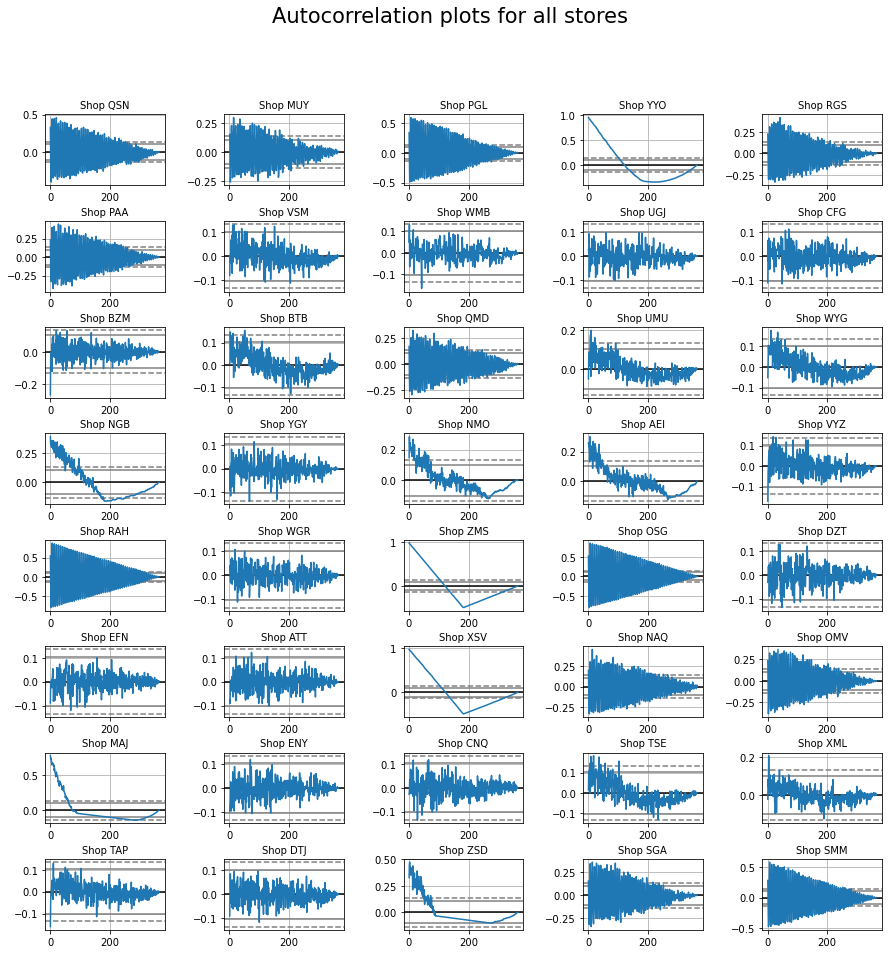

In [11]:
# Inialize number of rows and columns for the subplots
row = 0
col = 0

# Specify the size of figure and the number of rows and columns wanted
fig, axes = plt.subplots(figsize=(15, 15), nrows=8, ncols=5)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))

# Plot the figure for all stores
for name in shop_data.index:
    sub = pd.plotting.autocorrelation_plot(customers_visits[name], axes[row, col])
    sub.set_title('Shop ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("Autocorrelation plots for all stores",fontsize=21)
plt.show()

<h4>Indications:</h4>
<li> We care about graphs that line outside the dotted margins mainly.</li>
<li> Several shops present this characteristic.</li>
<li> Were gonna focus on the large sized stores (high stores) since they all present this feautre.</li>

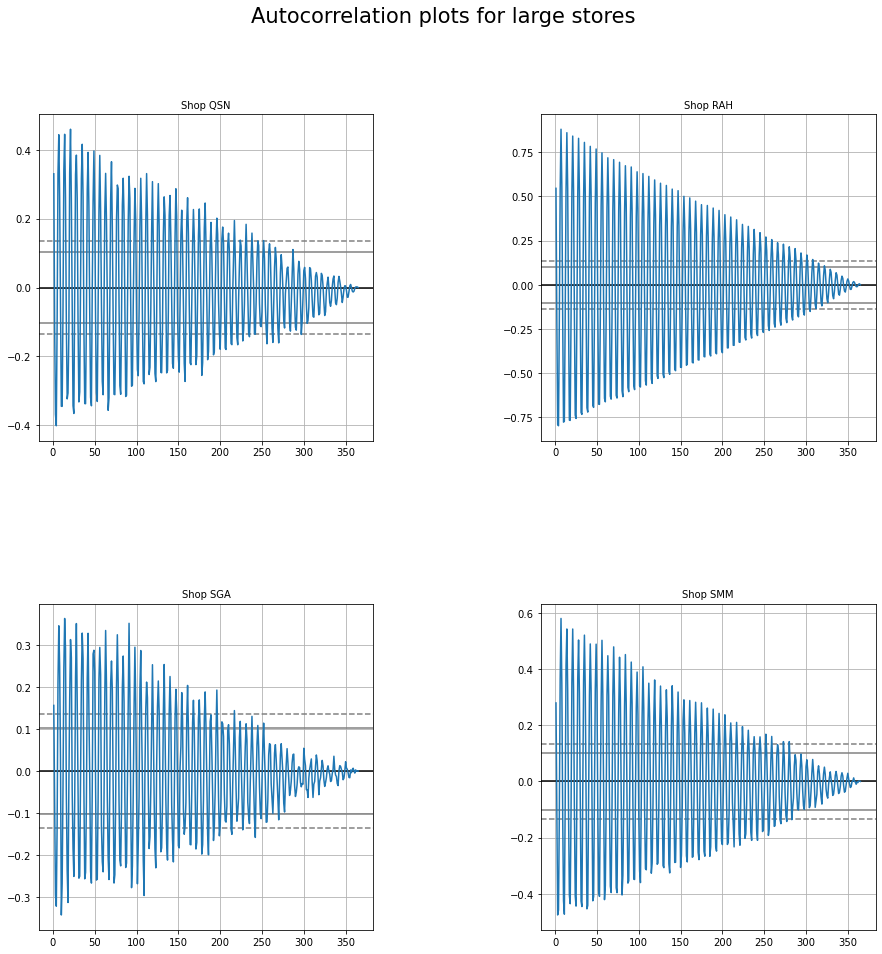

In [12]:
# Inialize number of rows and columns for the subplots
row = 0
col = 0

# Specify the size of figure and the number of rows and columns wanted
fig, axes = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
fig.suptitle('Autocorrelation plots', fontsize=20, position=(0.5, 1.0))

# Plot the figure for all stores
for name in high:
    sub = pd.plotting.autocorrelation_plot(customers_visits[name], axes[row, col])
    sub.set_title('Shop ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 2:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("Autocorrelation plots for large stores",fontsize=21)
plt.show()

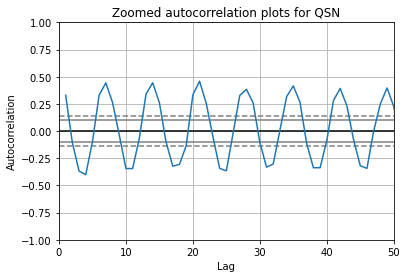

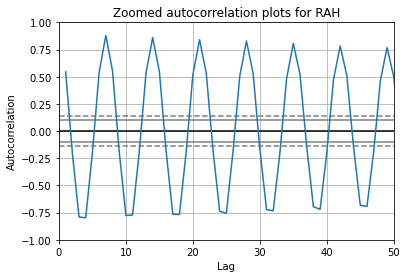

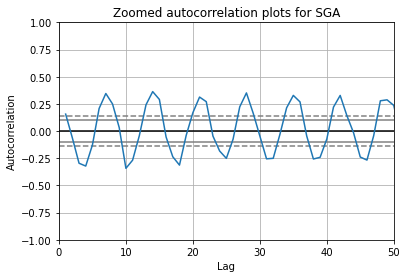

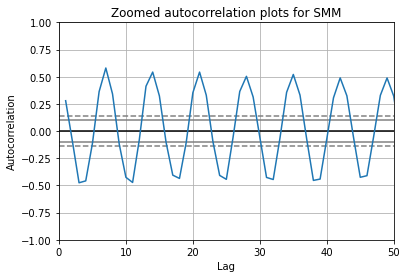

In [13]:
# Plot the autocorrelation sub plots fot the high stores
for name in high:
    pd.plotting.autocorrelation_plot(customers_visits[name])
    plt.xlim([0, 50])
    plt.title('Zoomed autocorrelation plots for ' + name)
    plt.show()


<h4> Indications: </h4>
<li> The horizontal axis shows the “Lag” size between the peaks of the time series.
    <li> All stores present a peak every seven days on x-axis:7-14, 14-21, etc..

<h1> 10.1- Correlations Pair Plots

Text(0.5, 1.02, 'Correlation Pairplot')

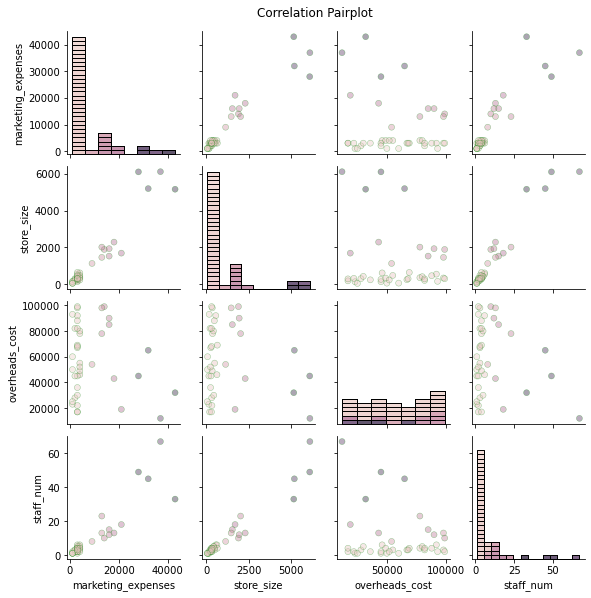

In [14]:
# Use seaborns pairgrid function to plot a visually pleasing pairplot 
# where the colour grading represents the number of visitors

g = sns.PairGrid(shop_data, hue='customers_visits')
g.map_lower(sns.scatterplot, alpha=0.4, edgecolor='green')
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_upper(sns.scatterplot, alpha=0.4, edgecolor='green')
g.fig.set_figwidth(8)
g.fig.set_figheight(8)
plt.suptitle("Correlation Pairplot",y=1.02)

<h4> Indications: </h4>
<li> The scattered dots represent values for two different features.
    <li> The dot’s alignment over the x-axis and y-axis signifies the value for an individual feature.
        <li> The diagonal presents a bar plot for every feature.
            <li> Positive correlations exist between marketing expenses and customer visits, store size, and staff number
                <li> No correlation between overhead costs and all of the other elements.
                    <li> No negative correlations.

<h1> 10.2- Correlations Heatmap to emphasize on the pair plot

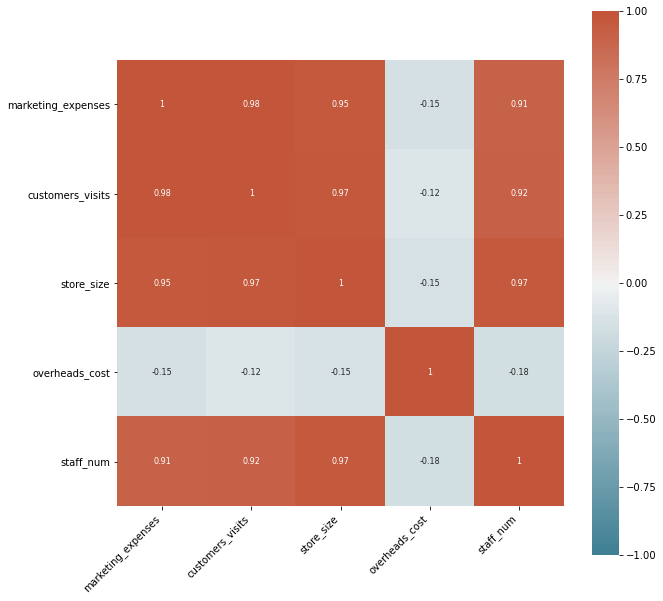

In [15]:
plt.figure(figsize=(10, 10))
corr = shop_data[shop_data.columns.values].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


<h4>Documentation:</h4>
<li> Dark Red = High positive correlation.
<li> Dark Blue = High negative correlation.
<li> Light colours: Low negative and positive correlations.

<h1> 11- Creating Radar Plots to study the high data correlations

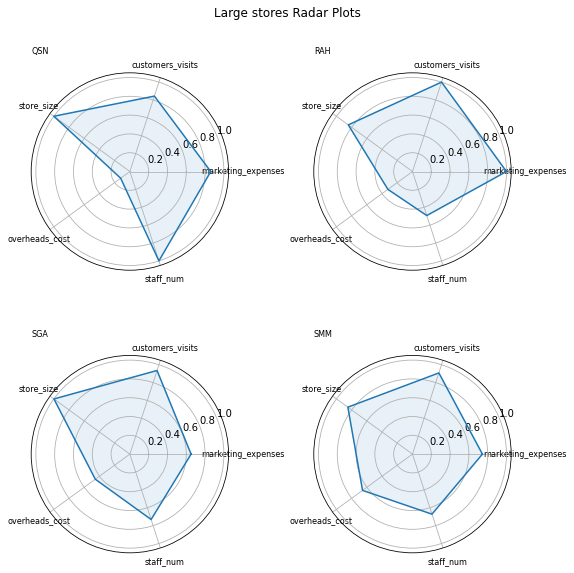

In [16]:
#normalize data so it would range between 0 & 1
normalised_data = shop_data / shop_data.max()

#set the features in use with equal angles
n_attributes = len(shop_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi
        for n in range(n_attributes + 1)]

# Plot the radas for top stores
plt.figure(figsize=(8, 8))
counter = 1
for name in high:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles,values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2,0.4,0.6,0.8,1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title(name, fontsize=8, loc='left')
    counter += 1
plt.tight_layout()
plt.suptitle("Large stores Radar Plots",y=1.02)
plt.show()

<h4> Indications: </h4>
<li> All five features are equally spaced along with the circles.
    <li> The inside of the circle is segmented into five different parts, ranging from 0, 0.2, 0.4, 0.6, 0.8, and 1.
        <li> Values are normalized.
            <li> High marketing budget with a large store size leads to high visits.
                <li> Number of employees should be half of the store’s size ratio.

<h1> 12- Bubble graph for Marketing Expenses vs Store Size (vs Customers Visits)

In [17]:
def get_summary_plots(variable_x, variable_y, variable_z, bubble_scaling):
    shop_data['BubbleSize'] = shop_data[variable_z] / shop_data[variable_z].max() * math.exp(bubble_scaling)
    return shop_data.hvplot.scatter(frame_height=500, frame_width=500,
                                       title=variable_x + ' vs ' + variable_y + ' (vs ' + variable_z + ')',
                                       alpha=0.5, hover_cols='all', padding=0.1, fontsize=14,
                                       x=variable_x, y=variable_y, size='BubbleSize',c='customers_visits') 


variables_title = '### Variables'

variable_x = pn.widgets.Select(name='X-axis', options=variables, value=variables[0], width=200)
variable_y = pn.widgets.Select(name='Y-axis', options=variables, value=variables[1], width=200)
variable_z = pn.widgets.Select(name='Bubble', options=variables, value=variables[2], width=200)
bubble_scaling = pn.widgets.IntSlider(name='Bubble scaling', value=5, start=0, end=10, width=200)

variables_row = pn.Row(
    pn.Column(variables_title, variable_x, variable_y, variable_z, bubble_scaling),
    get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)
)

def update_variables_row(event):
    variables_row[1].object = get_summary_plots(variable_x.value, variable_y.value, variable_z.value, bubble_scaling.value)

variable_x.param.watch(update_variables_row, 'value')
variable_y.param.watch(update_variables_row, 'value')
variable_z.param.watch(update_variables_row, 'value')
bubble_scaling.param.watch(update_variables_row, 'value')

variables_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='X-axis', options=['marketing_expenses', ...], value='marketing_expenses', width=200)
        [2] Select(name='Y-axis', options=['marketing_expenses', ...], value='customers_visits', width=200)
        [3] Select(name='Bubble', options=['marketing_expenses', ...], value='store_size', width=200)
        [4] IntSlider(end=10, name='Bubble scaling', value=5, value_throttled=5, width=200)
    [1] HoloViews(Scatter)

<h4>The Bubble graph support:</h4>
<li> The ability to choose the x-axis values, y-axis values, bubble dependant and size.
    <li> The ability to zoom in to specific sections using the zoom button.
        <li> The ability to hover on the graph to read the data.
            
<br>
<h4>Documentation:</h4>
            <li> We care about zooming to each section which includes high, medium and low data using zoom tool.
            <li> x-axis : Marketing Expenses
                <li> y-axis : Store Size
                    <li> Bubble ratio: Customers Visits
                        <li> The darker the color of the bubble is (closer to purple), the higher the number of visits is.
                            <li> Marketing budget with a large store can increase the sales (number of visitors) at a much higher rate than a small shop.

In [ ]:
g = sns.PairGrid(customers_visits.columns, hue='customers_visits')
g.map_lower(sns.scatterplot, alpha=0.4, edgecolor='green')
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_upper(sns.scatterplot, alpha=0.4, edgecolor='green')
g.fig.set_figwidth(8)
g.fig.set_figheight(8)
plt.suptitle("Correlation Pairplot",y=1.02)